<a href="https://colab.research.google.com/github/Wiryawanadip/Colab/blob/main/Uts1_G_211_21_0059.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Skrip dibawah ini untuk menampilkan data csv
data = pd.read_csv('CADdataset.csv')
data.head(5)

,Age,Weight,Height,Sex,BMI,DM,HT2,Curre2t Smoker,Obesit1,DLP,...,LVH,PRP,FBS,ESR,EF,RWMA,EX-Smoker,CR,BU2,1
0,53,90,175,1,29.387755,0,1,1,1,1,...,2,2,90,7,50,0,0,0.7,8,1
1,67,70,157,2,28.398718,0,1,0,1,2,...,2,2,80,26,40,4,0,1.0,30,1
2,54,54,164,1,20.077335,0,0,1,2,2,...,2,2,85,10,40,2,0,1.0,17,1
3,66,67,158,2,26.838648,0,1,0,1,2,...,2,2,78,76,55,0,0,1.2,30,2
4,50,87,153,2,37.165193,0,1,0,1,2,...,2,2,104,27,50,0,0,1.0,16,2


In [7]:
# Berfungsi untuk mencari nilai
data.isnull().sum()

Age                   0
Weight                0
Height                0
Sex                   0
BMI                   0
DM                    0
HT2                   0
Curre2t Smoker        0
Obesit1               0
DLP                   0
BP                    0
WPE                   0
T1pical Chest Pai2    0
At1pical              0
2o2a2gi2al            0
St Depressio2         0
Ti2versio2            0
LVH                   0
PRP                   0
FBS                   0
ESR                   0
EF                    0
 RWMA                 0
EX-Smoker             0
CR                    0
BU2                   0
1                     0
dtype: int64

In [8]:
# Untuk mencari X dan y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [9]:
# Untuk training dan testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
# Untuk membuat nilai range data menjadi 0-1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
# Mendefinisikan variabel calssifier untuk K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# Mendefinisikan variabel y_pred untuk predict data X_test
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]]


In [32]:
# Membuat array untuk testing dan training
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [35]:
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

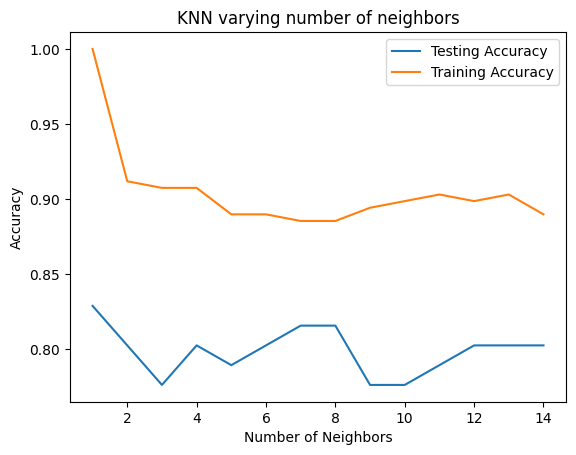

In [34]:
# Menampilkan grafik data testing dan training untuk mencari nilai K terbaik dari 1-14
_ = plt.title('KNN varying number of neighbors')
_ = plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
_ = plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [30]:
# Untuk mencari akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[49  5]
 [11 11]]


0.7894736842105263